In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from glob import glob

import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotx
import pandas as pd
from fastcore.xtras import load_pickle

from gptchem.settings import ONE_COL_WIDTH_INCH, TWO_COL_GOLDEN_RATIO_HEIGHT_INCH

mpl.rcParams.update(mpl.rcParamsDefault)
plt.style.use(["science", "nature"])
%matplotlib inline

## Load results

In [3]:
all_out = glob("out/**/*.pkl")

In [4]:
all_out = [load_pickle(p) for p in all_out]

In [5]:
all_out[0]

{'num_classes': 2,
 'num_train_points': 20,
 'accuracy': 0.49,
 'acc_macro': 0.49,
 'racc': 0.5,
 'kappa': -0.020000000000000018,
 'confusion_matrix': pycm.ConfusionMatrix(classes: [0, 1]),
 'f1_macro': 0.48872180451127817,
 'f1_micro': 0.49,
 'frac_valid': 1.0,
 'all_y_true': (#100) [1,1,1,1,0,1,1,0,0,0...],
 'all_y_pred': (#100) [0,0,1,0,1,1,1,0,0,1...],
 'valid_indices': [0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  44,
  45,
  46,
  47,
  48,
  49,
  50,
  51,
  52,
  53,
  54,
  55,
  56,
  57,
  58,
  59,
  60,
  61,
  62,
  63,
  64,
  65,
  66,
  67,
  68,
  69,
  70,
  71,
  72,
  73,
  74,
  75,
  76,
  77,
  78,
  79,
  80,
  81,
  82,
  83,
  84,
  85,
  86,
  87,
  88,
  89,
  90,
  91,
  92,
  93,
  94,
  95,
  96,
  97,
  98,
  99],
 'might_have_rounded_floats': Fal

In [6]:
extracted_res = []
baseline = []

for out in all_out:
    res = {
        "train_size": out["num_train_points"],
        "frac_valid": out["frac_valid"],
        "accuracy": out["accuracy"],
        "f1_macro": out["f1_macro"],
        "f1_micro": out["f1_micro"],
        "kappa": out["kappa"],
        "num_classes": out["num_classes"],
        "representation": out["representation"] if "representation" in out else "mofid",
    }

    baseline_res = {
        "train_size": out["num_train_points"],
        "accuracy": out["baseline"]["accuracy"],
        "f1_macro": out["baseline"]["f1_macro"],
        "f1_micro": out["baseline"]["f1_micro"],
        "kappa": out["baseline"]["kappa"],
        "num_classes": out["num_classes"],
    }

    extracted_res.append(res)
    baseline.append(baseline_res)

In [7]:
res = pd.DataFrame(extracted_res)
baseline = pd.DataFrame(baseline)

In [8]:
grouped_res = res.groupby(["num_classes", "train_size", "representation"]).agg(
    ["mean", "std", "count"]
)

In [9]:
grouped_baseline_res = baseline.groupby(["num_classes", "train_size"]).agg(["mean", "std", "count"])

In [10]:
grouped_res

frac_valid             accuracy  \
                                            mean  std count      mean   
num_classes train_size representation                                   
2           10         grouped_mof           1.0  0.0     4  0.512500   
                       mofid                 1.0  0.0    10  0.553000   
            20         grouped_mof           1.0  0.0     4  0.542500   
                       mofid                 1.0  0.0    10  0.560000   
            50         grouped_mof           1.0  0.0     3  0.573477   
                       mofid                 1.0  0.0    10  0.573118   
            100        grouped_mof           1.0  0.0     3  0.604651   
                       mofid                 1.0  0.0     8  0.604651   
5           10         grouped_mof           1.0  0.0     4  0.207500   
                       mofid                 1.0  0.0    10  0.251000   
            20         grouped_mof           1.0  0.0     3  0.220000   
                       mofid                 1.0  0.0    10  0.256000   
            50         grouped_mof           1.0  0.0     3  0.240143   
                       mofid                 1.0  0.0    10  0.261290   
            100        grouped_mof           1.0  0.0     3  0.341085   
                       mofid                 1.0  0.0     8  0.287791   

                                                       f1_macro            \
                                            std count      mean       std   
num_classes train_size representation                                       
2           10         grouped_mof     0.009574     4  0.449607  0.073214   
                       mofid           0.055787    10  0.518027  0.080284   
            20         grouped_mof     0.041932     4  0.537650  0.045621   
                       mofid           0.050772    10  0.549742  0.047968   
            50         grouped_mof     0.034565     3  0.570586  0.034909   
                       mofid           0.064526    10  0.569785  0.065441   
            100        grouped_mof     0.023256     3  0.603683  0.022459   
                       mofid           0.035159     8  0.602092  0.035030   
5           10         grouped_mof     0.034034     4  0.144229  0.029346   
                       mofid           0.025144    10  0.215703  0.032994   
            20         grouped_mof     0.000000     3  0.207771  0.010889   
                       mofid           0.039497    10  0.230515  0.043017   
            50         grouped_mof     0.027060     3  0.233749  0.021978   
                       mofid           0.054369    10  0.247117  0.050583   
            100        grouped_mof     0.048411     3  0.323882  0.051753   
                       mofid           0.086960     8  0.278979  0.092790   

                                             f1_micro                  \
                                      count      mean       std count   
num_classes train_size representation                                   
2           10         grouped_mof        4  0.512500  0.009574     4   
                       mofid             10  0.553000  0.055787    10   
            20         grouped_mof        4  0.542500  0.041932     4   
                       mofid             10  0.560000  0.050772    10   
            50         grouped_mof        3  0.573477  0.034565     3   
                       mofid             10  0.573118  0.064526    10   
            100        grouped_mof        3  0.604651  0.023256     3   
                       mofid              8  0.604651  0.035159     8   
5           10         grouped_mof        4  0.207500  0.034034     4   
                       mofid             10  0.251000  0.025144    10   
            20         grouped_mof        3  0.220000  0.000000     3   
                       mofid             10  0.256000  0.039497    10   
            50         grouped_mof        3  0.240143  0.027060     3   
                  

In [11]:
grouped_baseline_res

accuracy                  f1_macro                  \
                            mean       std count      mean       std count   
num_classes train_size                                                       
2           10          0.865000  0.031071    14  0.864152  0.031722    14   
            20          0.894286  0.032749    14  0.893842  0.033218    14   
            50          0.894127  0.016914    13  0.894026  0.016953    13   
            100         0.887949  0.020322    11  0.887697  0.020445    11   
5           10          0.670714  0.065921    14  0.669307  0.067298    14   
            20          0.723846  0.062255    13  0.721827  0.061742    13   
            50          0.751034  0.025158    13  0.750746  0.024379    13   
            100         0.771670  0.081772    11  0.769918  0.083555    11   

                        f1_micro                     kappa                  
                            mean       std count      mean       std count  
num_classes train_size                                                      
2           10          0.865000  0.031071    14  0.730000  0.062141    14  
            20          0.894286  0.032749    14  0.788571  0.065499    14  
            50          0.894127  0.016914    13  0.788217  0.033816    13  
            100         0.887949  0.020322    11  0.775653  0.040800    11  
5           10          0.670714  0.065921    14  0.588393  0.082401    14  
            20          0.723846  0.062255    13  0.654808  0.077818    13  
            50          0.751034  0.025158    13  0.688952  0.031404    13  
            100         0.771670  0.081772    11  0.715013  0.101983    11

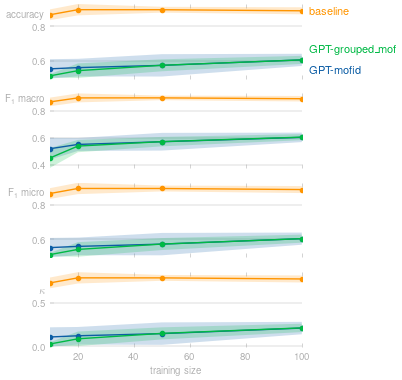

In [12]:
with plt.style.context(matplotx.styles.dufte):
    fig, ax = plt.subplots(
        4, 1, figsize=(ONE_COL_WIDTH_INCH, TWO_COL_GOLDEN_RATIO_HEIGHT_INCH), sharex="all"
    )

    # plot the binary case, i.e. num_classes = 2

    for i, metric in enumerate(["accuracy", "f1_macro", "f1_micro", "kappa"]):
        ax[i].plot(
            grouped_res.loc[2, :, "mofid"].index,
            grouped_res.loc[2, :, "mofid"][metric]["mean"],
            marker="o",
            label="GPT-mofid",
        )
        ax[i].fill_between(
            grouped_res.loc[2, :, "mofid"].index,
            grouped_res.loc[2, :, "mofid"][metric]["mean"]
            - grouped_res.loc[2, :, "mofid"][metric]["std"],
            grouped_res.loc[2, :, "mofid"][metric]["mean"]
            + grouped_res.loc[2, :, "mofid"][metric]["std"],
            alpha=0.2,
        )

        ax[i].plot(
            grouped_res.loc[2, :, "grouped_mof"].index,
            grouped_res.loc[2, :, "grouped_mof"][metric]["mean"],
            marker="o",
            label="GPT-grouped_mof",
        )
        ax[i].fill_between(
            grouped_res.loc[2, :, "grouped_mof"].index,
            grouped_res.loc[2, :, "grouped_mof"][metric]["mean"]
            - grouped_res.loc[2, :, "grouped_mof"][metric]["std"],
            grouped_res.loc[2, :, "grouped_mof"][metric]["mean"]
            + grouped_res.loc[2, :, "grouped_mof"][metric]["std"],
            alpha=0.2,
        )

        ax[i].plot(
            grouped_baseline_res.loc[2, :].index,
            grouped_baseline_res.loc[2, :][metric]["mean"],
            marker="o",
            label="baseline",
        )
        ax[i].fill_between(
            grouped_baseline_res.loc[2, :].index,
            grouped_baseline_res.loc[2, :][metric]["mean"]
            - grouped_baseline_res.loc[2, :][metric]["std"],
            grouped_baseline_res.loc[2, :][metric]["mean"]
            + grouped_baseline_res.loc[2, :][metric]["std"],
            alpha=0.2,
        )

    ax[-1].set_xlabel("training size", labelpad=4)
    # ax[0].legend()

    matplotx.line_labels(ax[0], fontsize=8)

    matplotx.ylabel_top("accuracy", ax=ax[0])
    matplotx.ylabel_top(r"F$_{1}$ macro", ax=ax[1])
    matplotx.ylabel_top(r"F$_{1}$ micro", ax=ax[2])
    matplotx.ylabel_top(r"$\kappa$", ax=ax[3])

    # fig.tight_layout()
    fig.savefig("cv-classification_results_2.pdf", bbox_inches="tight")

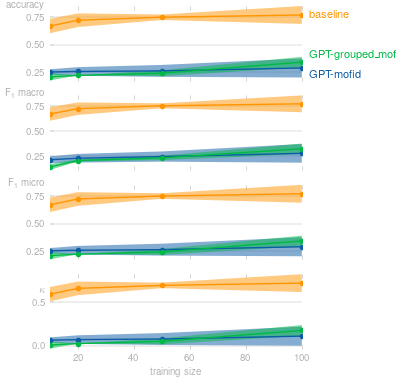

In [13]:
with plt.style.context(matplotx.styles.dufte):
    fig, ax = plt.subplots(
        4, 1, figsize=(ONE_COL_WIDTH_INCH, TWO_COL_GOLDEN_RATIO_HEIGHT_INCH), sharex="all"
    )

    # plot the binary case, i.e. num_classes = 2

    for i, metric in enumerate(["accuracy", "f1_macro", "f1_micro", "kappa"]):
        ax[i].plot(
            grouped_res.loc[5, :, "mofid"].index,
            grouped_res.loc[5, :, "mofid"][metric]["mean"],
            marker="o",
            label="GPT-mofid",
        )
        ax[i].fill_between(
            grouped_res.loc[5, :, "mofid"].index,
            grouped_res.loc[5, :, "mofid"][metric]["mean"]
            - grouped_res.loc[5, :, "mofid"][metric]["std"],
            grouped_res.loc[5, :, "mofid"][metric]["mean"]
            + grouped_res.loc[5, :, "mofid"][metric]["std"],
            alpha=0.5,
        )

        ax[i].plot(
            grouped_res.loc[5, :, "grouped_mof"].index,
            grouped_res.loc[5, :, "grouped_mof"][metric]["mean"],
            marker="o",
            label="GPT-grouped_mof",
        )
        ax[i].fill_between(
            grouped_res.loc[5, :, "grouped_mof"].index,
            grouped_res.loc[5, :, "grouped_mof"][metric]["mean"]
            - grouped_res.loc[5, :, "grouped_mof"][metric]["std"],
            grouped_res.loc[5, :, "grouped_mof"][metric]["mean"]
            + grouped_res.loc[5, :, "grouped_mof"][metric]["std"],
            alpha=0.5,
        )

        ax[i].plot(
            grouped_baseline_res.loc[5, :].index,
            grouped_baseline_res.loc[5, :][metric]["mean"],
            marker="o",
            label="baseline",
        )
        ax[i].fill_between(
            grouped_baseline_res.loc[5, :].index,
            grouped_baseline_res.loc[5, :][metric]["mean"]
            - grouped_baseline_res.loc[5, :][metric]["std"],
            grouped_baseline_res.loc[5, :][metric]["mean"]
            + grouped_baseline_res.loc[5, :][metric]["std"],
            alpha=0.5,
        )

    ax[-1].set_xlabel("training size", labelpad=4)
    # ax[0].legend()

    matplotx.line_labels(ax[0], fontsize=8)

    matplotx.ylabel_top("accuracy", ax=ax[0])
    matplotx.ylabel_top(r"F$_{1}$ macro", ax=ax[1])
    matplotx.ylabel_top(r"F$_{1}$ micro", ax=ax[2])
    matplotx.ylabel_top(r"$\kappa$", ax=ax[3])

    # fig.tight_layout()
    fig.savefig("cv-classification_results_5.pdf", bbox_inches="tight")